In [1]:
from BaselineRemoval import BaselineRemoval
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=pd.read_csv('Biomass_4comp_Baseline.csv',header=0)
keys=df.keys()
wave=df['lambda'].to_numpy()
keys

Index(['Unnamed: 0', 'lambda', 'PC1.csv', 'PC2.csv', 'PC3.csv', 'PC4.csv'], dtype='object')

Acetone.csv


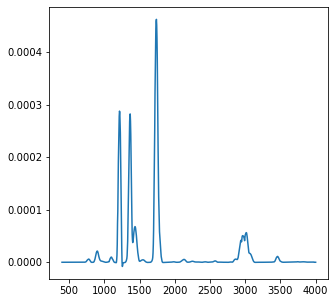


Benzene.csv


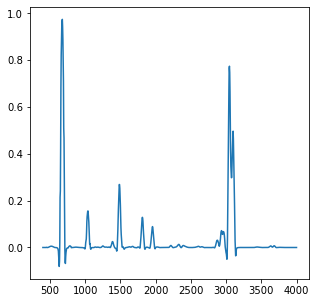


Chloromethane.csv


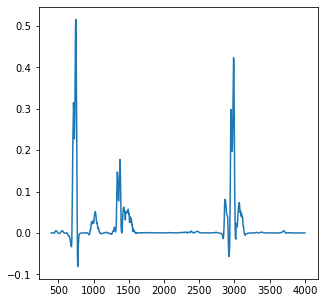


Ethene.csv


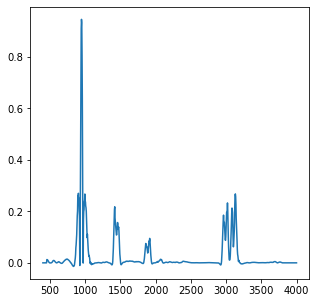


Ethyne.csv


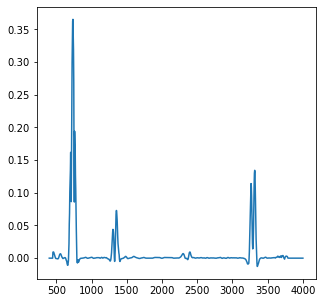


Formaldehyde.csv


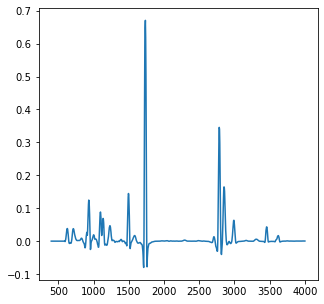


Formic acid.csv


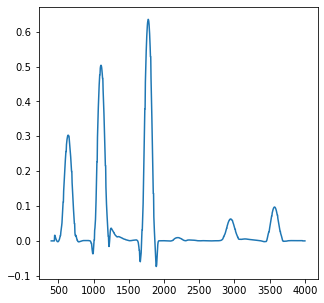


Methane.csv


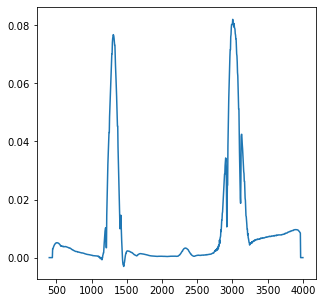


Methanol.csv


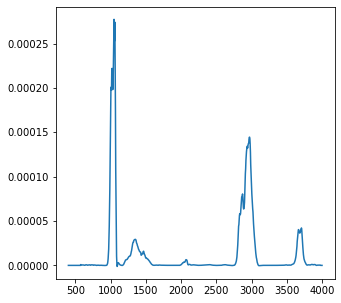


Methoxymethane.csv


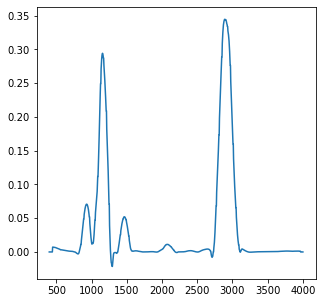


Methyl Formate.csv


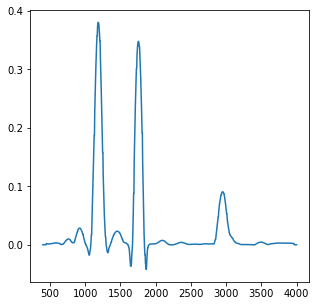


Methylamine.csv


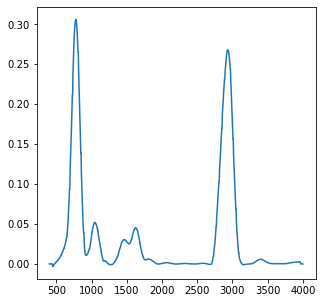


Nitromethane.csv


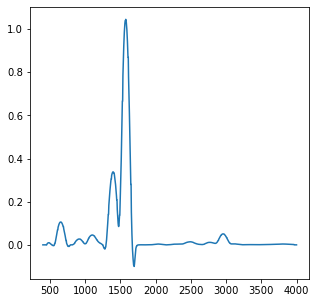

In [7]:
for key in keys[2:]:
    data=df[key].to_numpy()
    print(key)
    if key=='cyclohexene.csv':
        data[data<0]=-0.035
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.plot(wave, data)
    plt.show()
    input()

In [4]:
dict={}
dict['lambda']=wave
num=0
for key in keys[2:]:
    data=df[key].to_numpy()

    try:
        data=savgol_filter(data,19,2)
        print('Denoised :',num)
    except:
        pass
    maximum=max(data)
    minimum=min(data)
    data=(data-minimum)/(maximum-minimum)
    print(max(data),min(data))
    dict[key]=data
    num+=1

Denoised : 0
1.0 0.0
Denoised : 1
1.0 0.0
Denoised : 2
1.0 0.0
Denoised : 3
1.0 0.0


In [5]:
df=pd.DataFrame(dict)
df.to_csv('Biomass_4comp_Baseline.csv',index=None)